## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from turbodbc import connect, make_options
from datetime import datetime, timedelta
import pytz

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import statsmodels.api as sm


import random
import pickle
import re


import warnings
warnings.simplefilter('ignore')

In [2]:
pd.set_option('display.max_columns', None)

### Submission Format

In [3]:
df_submission=pd.read_csv('submission_format.csv')
df_submission.head()

,city,year,weekofyear,total_cases
0,sj,2008,18,0
1,sj,2008,19,0
2,sj,2008,20,0
3,sj,2008,21,0
4,sj,2008,22,0


In [4]:
df_submission.tail()

,city,year,weekofyear,total_cases
411,iq,2013,22,0
412,iq,2013,23,0
413,iq,2013,24,0
414,iq,2013,25,0
415,iq,2013,26,0


In [5]:
df_submission.city.unique()

array(['sj', 'iq'], dtype=object)

In [6]:
df_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 4 columns):
city           416 non-null object
year           416 non-null int64
weekofyear     416 non-null int64
total_cases    416 non-null int64
dtypes: int64(3), object(1)
memory usage: 13.1+ KB


### Features Explained

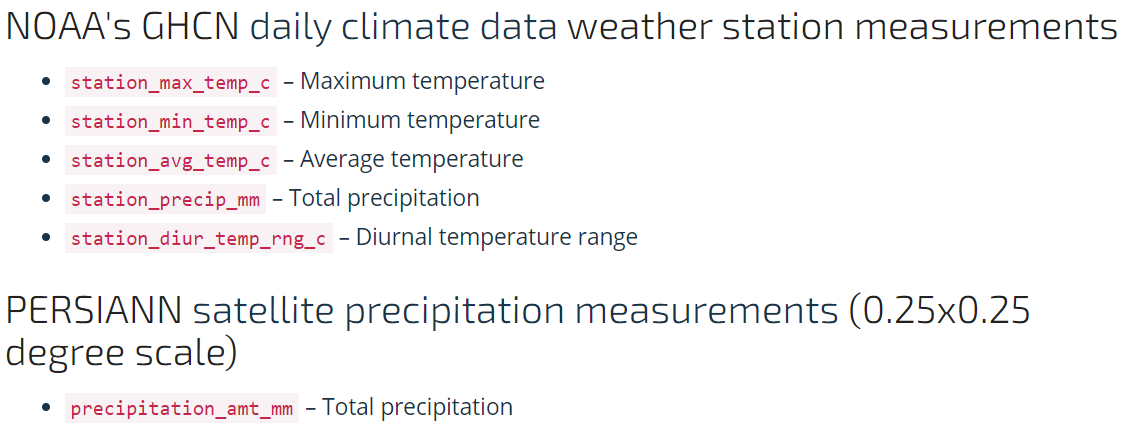

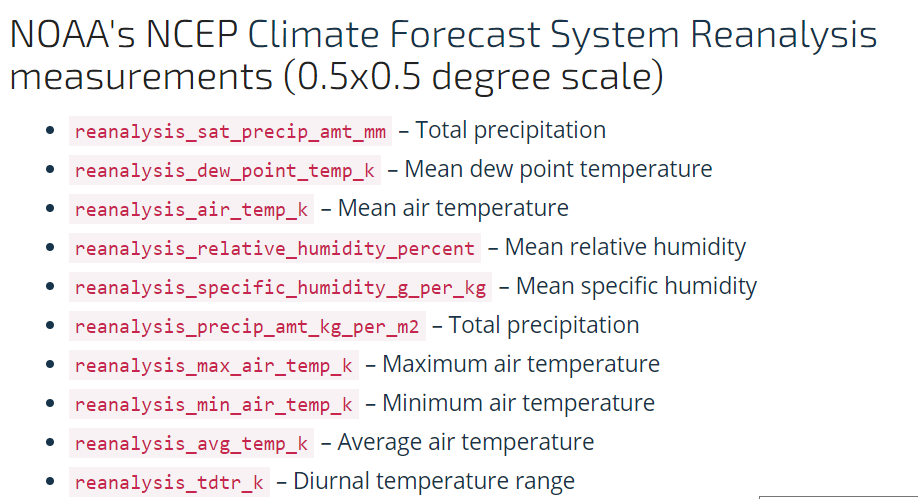

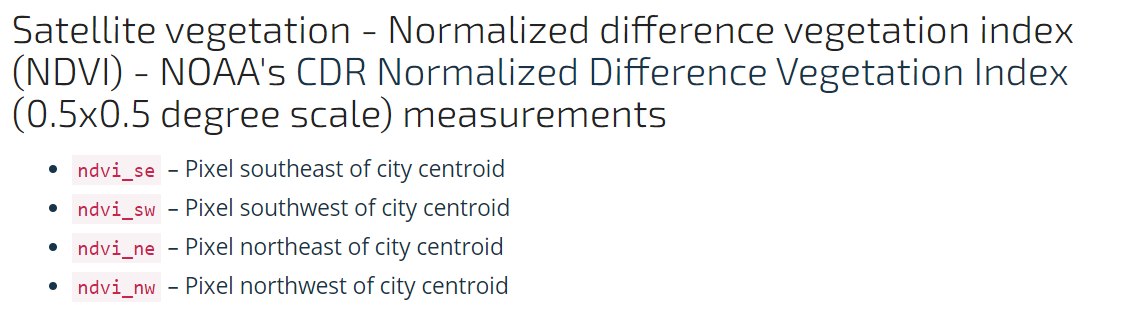

### Training Set

In [7]:
df_train_features=pd.read_csv('dengue_features_train.csv')
df_train_features.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [8]:
df_train_features.tail()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,296.825714,309.7,294.5,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,296.452857,308.5,291.9,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,295.501429,305.5,292.4,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,297.521429,295.324286,306.1,291.9,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0
1455,iq,2010,25,2010-06-25,0.298186,0.232971,0.274214,0.315757,63.22,298.097143,299.835714,295.807143,307.8,292.3,36.90,89.082857,63.22,17.355714,11.014286,27.475000,9.900000,33.7,22.2,20.4


In [9]:
df_train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
city                                     1456 non-null object
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
week_start_date                          1456 non-null object
ndvi_ne                                  1262 non-null float64
ndvi_nw                                  1404 non-null float64
ndvi_se                                  1434 non-null float64
ndvi_sw                                  1434 non-null float64
precipitation_amt_mm                     1443 non-null float64
reanalysis_air_temp_k                    1446 non-null float64
reanalysis_avg_temp_k                    1446 non-null float64
reanalysis_dew_point_temp_k              1446 non-null float64
reanalysis_max_air_temp_k                1446 non-null float64
reanalysis_min_air_temp_k                1446 non-null float64
reanalysis_precip

In [10]:
pd.isnull(df_train_features).any()

city                                     False
year                                     False
weekofyear                               False
week_start_date                          False
ndvi_ne                                   True
ndvi_nw                                   True
ndvi_se                                   True
ndvi_sw                                   True
precipitation_amt_mm                      True
reanalysis_air_temp_k                     True
reanalysis_avg_temp_k                     True
reanalysis_dew_point_temp_k               True
reanalysis_max_air_temp_k                 True
reanalysis_min_air_temp_k                 True
reanalysis_precip_amt_kg_per_m2           True
reanalysis_relative_humidity_percent      True
reanalysis_sat_precip_amt_mm              True
reanalysis_specific_humidity_g_per_kg     True
reanalysis_tdtr_k                         True
station_avg_temp_c                        True
station_diur_temp_rng_c                   True
station_max_t

In [11]:
df_train_labels=pd.read_csv('dengue_labels_train.csv')
df_train_labels.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [12]:
df_train_labels.tail()

,city,year,weekofyear,total_cases
1451,iq,2010,21,5
1452,iq,2010,22,8
1453,iq,2010,23,1
1454,iq,2010,24,1
1455,iq,2010,25,4


In [13]:
df_train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 4 columns):
city           1456 non-null object
year           1456 non-null int64
weekofyear     1456 non-null int64
total_cases    1456 non-null int64
dtypes: int64(3), object(1)
memory usage: 45.6+ KB


In [14]:
pd.isnull(df_train_labels).any()

city           False
year           False
weekofyear     False
total_cases    False
dtype: bool

In [15]:
# Merging the training dataset labels and features
df_training_full= pd.merge(df_train_labels, df_train_features, on=['city','year','weekofyear'],  how='inner')
df_training_full.head()

,city,year,weekofyear,total_cases,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,4,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,5,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,4,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,3,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,6,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [16]:
df_training_full.tail()

,city,year,weekofyear,total_cases,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
1451,iq,2010,21,5,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,296.825714,309.7,294.5,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0
1452,iq,2010,22,8,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,296.452857,308.5,291.9,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6
1453,iq,2010,23,1,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,295.501429,305.5,292.4,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4
1454,iq,2010,24,1,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,297.521429,295.324286,306.1,291.9,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0
1455,iq,2010,25,4,2010-06-25,0.298186,0.232971,0.274214,0.315757,63.22,298.097143,299.835714,295.807143,307.8,292.3,36.90,89.082857,63.22,17.355714,11.014286,27.475000,9.900000,33.7,22.2,20.4


In [17]:
df_training_full.year.unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010],
      dtype=int64)

In [18]:
# df_training_full=df_training_full.drop(['city', 'year', 'weekofyear'], axis=1)
# df_training_full.head()

## Exploratory Data Analysis

In [19]:
df_training_full.shape

(1456, 25)

In [20]:
df_training_full.isna().sum()/len(df_training_full)*100

city                                      0.000000
year                                      0.000000
weekofyear                                0.000000
total_cases                               0.000000
week_start_date                           0.000000
ndvi_ne                                  13.324176
ndvi_nw                                   3.571429
ndvi_se                                   1.510989
ndvi_sw                                   1.510989
precipitation_amt_mm                      0.892857
reanalysis_air_temp_k                     0.686813
reanalysis_avg_temp_k                     0.686813
reanalysis_dew_point_temp_k               0.686813
reanalysis_max_air_temp_k                 0.686813
reanalysis_min_air_temp_k                 0.686813
reanalysis_precip_amt_kg_per_m2           0.686813
reanalysis_relative_humidity_percent      0.686813
reanalysis_sat_precip_amt_mm              0.892857
reanalysis_specific_humidity_g_per_kg     0.686813
reanalysis_tdtr_k              

In [21]:
df_training_full_1= df_training_full.apply(lambda x: x.fillna(method='ffill'))
pd.isnull(df_training_full_1).any()

city                                     False
year                                     False
weekofyear                               False
total_cases                              False
week_start_date                          False
ndvi_ne                                  False
ndvi_nw                                  False
ndvi_se                                  False
ndvi_sw                                  False
precipitation_amt_mm                     False
reanalysis_air_temp_k                    False
reanalysis_avg_temp_k                    False
reanalysis_dew_point_temp_k              False
reanalysis_max_air_temp_k                False
reanalysis_min_air_temp_k                False
reanalysis_precip_amt_kg_per_m2          False
reanalysis_relative_humidity_percent     False
reanalysis_sat_precip_amt_mm             False
reanalysis_specific_humidity_g_per_kg    False
reanalysis_tdtr_k                        False
station_avg_temp_c                       False
station_diur_

In [22]:
# Kelvin to celsius -conversion
conv_features=["reanalysis_air_temp_k", "reanalysis_avg_temp_k","reanalysis_dew_point_temp_k",
            "reanalysis_max_air_temp_k","reanalysis_min_air_temp_k"]
for i in conv_features:
    df_training_full_1[i] = df_training_full_1[i] - 273.15

## Hypothesis/Assumptions Testing

- Dengue fever is a tropical disease, so it is expected to be more in places with high temperature/precipitation and thus high humidity.

- It is transmitted by mosquitoes, who are common in summer, so that means summer will have more dengue cases compard to rest of the year.

- Iquitos is in Peru and a port city. It gateway to the jungle and tribal villages of the northern Amazon. So it is an for mosquitoes surrounded by jungle and water sources. 

- San juan is a city on an island and has a much lower population density than Iquitos.

- Based on this it is better to separate the data for each city.

(0.0, 0.09)

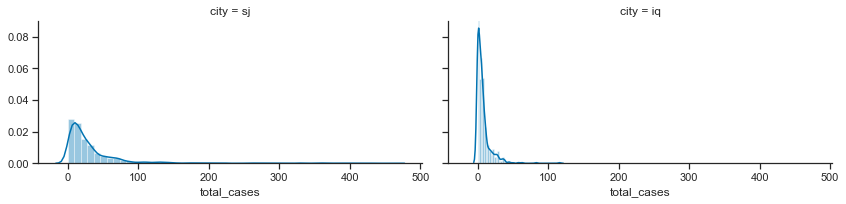

In [23]:
# total cases of Dengue in each city
sns.set(style="ticks", palette="colorblind")
g = sns.FacetGrid(df_training_full_1, col="city",aspect=2)  
g.map(sns.distplot, "total_cases") 
axes = g.axes
axes[0,0].set_ylim(0,0.090)
axes[0,1].set_ylim(0,0.090)

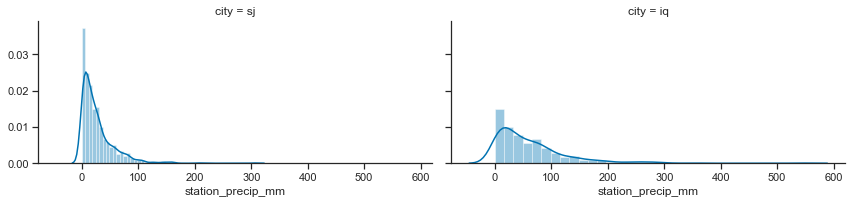

In [24]:
#Lets check the station_precip_mm in the city's
sns.set(style="ticks", palette="colorblind")
g = sns.FacetGrid(df_training_full_1, col="city",aspect=2)  
g.map(sns.distplot, "station_precip_mm")

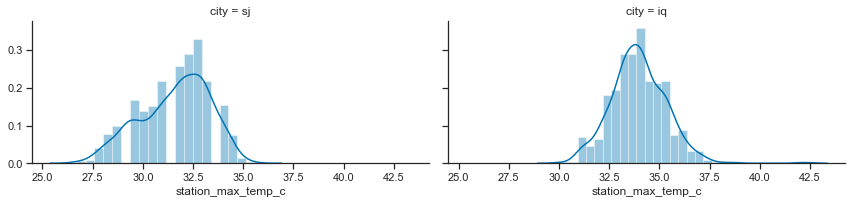

In [25]:
#Lets check the station_max_temp_c in the city's
sns.set(style="ticks", palette="colorblind")
g = sns.FacetGrid(df_training_full_1, col="city",aspect=2)  
g.map(sns.distplot, "station_max_temp_c")

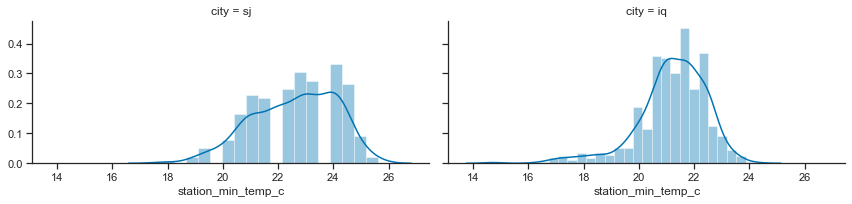

In [26]:
#Lets check the station_min_temp_c in the city's
sns.set(style="ticks", palette="colorblind")
g = sns.FacetGrid(df_training_full_1, col="city",aspect=2)  
g.map(sns.distplot, "station_min_temp_c")

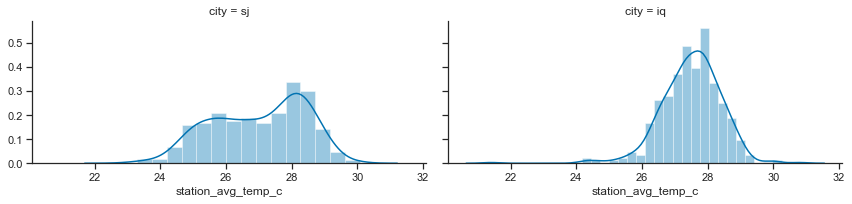

In [27]:
#Lets check the station_avg_temp_c in the city's
sns.set(style="ticks", palette="colorblind")
g = sns.FacetGrid(df_training_full_1, col="city",aspect=2)  
g.map(sns.distplot, "station_avg_temp_c")

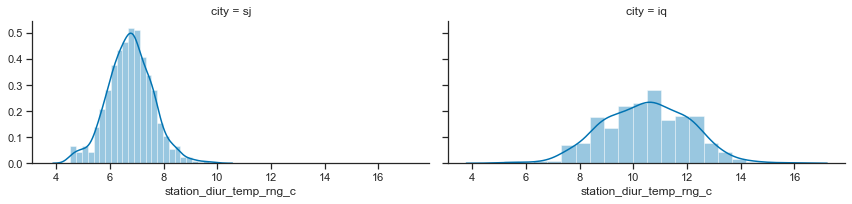

In [28]:
#Lets check the station_diur_temp_rng_c in the city's
#In meteorology, diurnal temperature variation is the variation between a high temperature and a low temperature 
#that occurs during the same day.

sns.set(style="ticks", palette="colorblind")
g = sns.FacetGrid(df_training_full_1, col="city",aspect=2)  
g.map(sns.distplot, "station_diur_temp_rng_c")

####  Sanjuan have overall more number of cases.

In [29]:
df_training_full_1.groupby('city').mean().total_cases

city
iq     7.565385
sj    34.180556
Name: total_cases, dtype: float64

#### Evolution of Cases Over Time

Text(0.5, 0.98, 'Evolution of dengue disease through time')

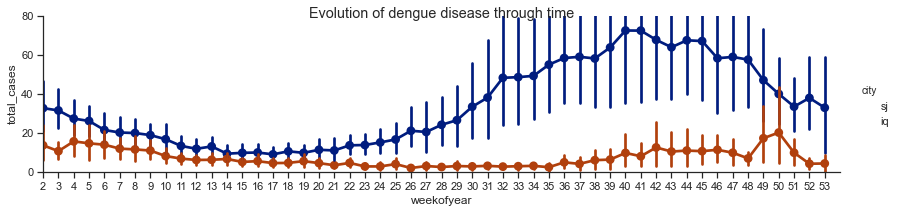

In [381]:
sns.set(style="ticks", palette="dark")
fig = sns.FacetGrid(df_training_full_1, hue='city', aspect=4) 
fig.map(sns.pointplot,'weekofyear','total_cases')
max_x = df_training_full_1.weekofyear.max()
min_x = df_training_full_1.weekofyear.min()
fig.set(xlim=(min_x,max_x))
fig.set(ylim=(0, 80))
fig.add_legend()
# plt.legend(title='city', loc='upper left', labels=['sj', 'iq'])
fig.fig.suptitle("Evolution of dengue disease through time")

#### We can see a trend in San Juan that the dengue virus becomes more active in the later half of the year- July (week 28).
#### On the other hand in Iquitos, dengue developed quite slowly, with its peak at the end of the year-week 50.

### Checking Correlation

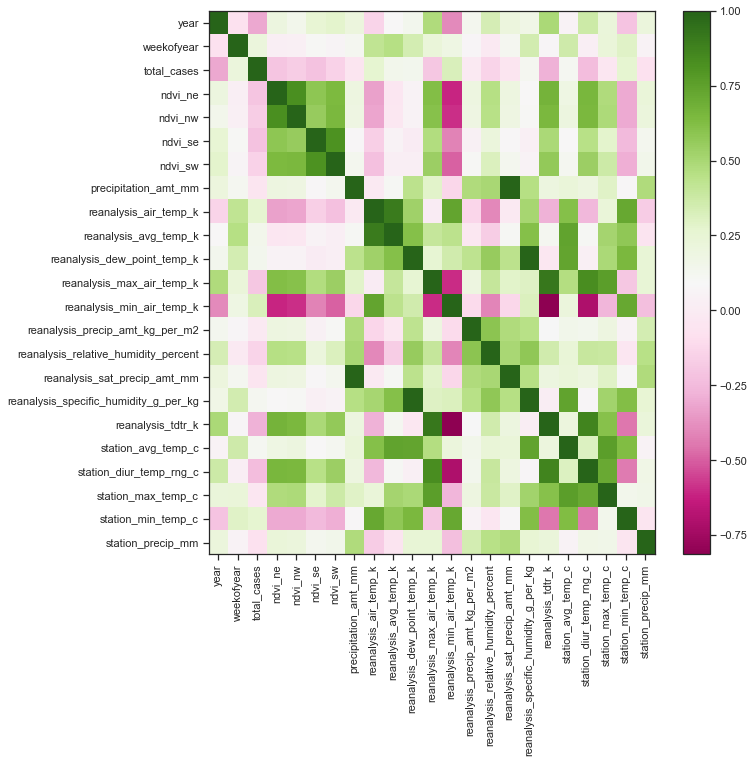

In [31]:
corr=df_training_full_1.corr()

import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(10, 10))
plt.imshow(corr, cmap='PiYG', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns,rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);
plt.show()

In [32]:
# Dropping some of the highly correlated features
df_training_full_1_1=df_training_full_1.drop(['precipitation_amt_mm', 'reanalysis_dew_point_temp_k', 'reanalysis_sat_precip_amt_mm'
                                             , 'reanalysis_specific_humidity_g_per_kg'],axis=1)

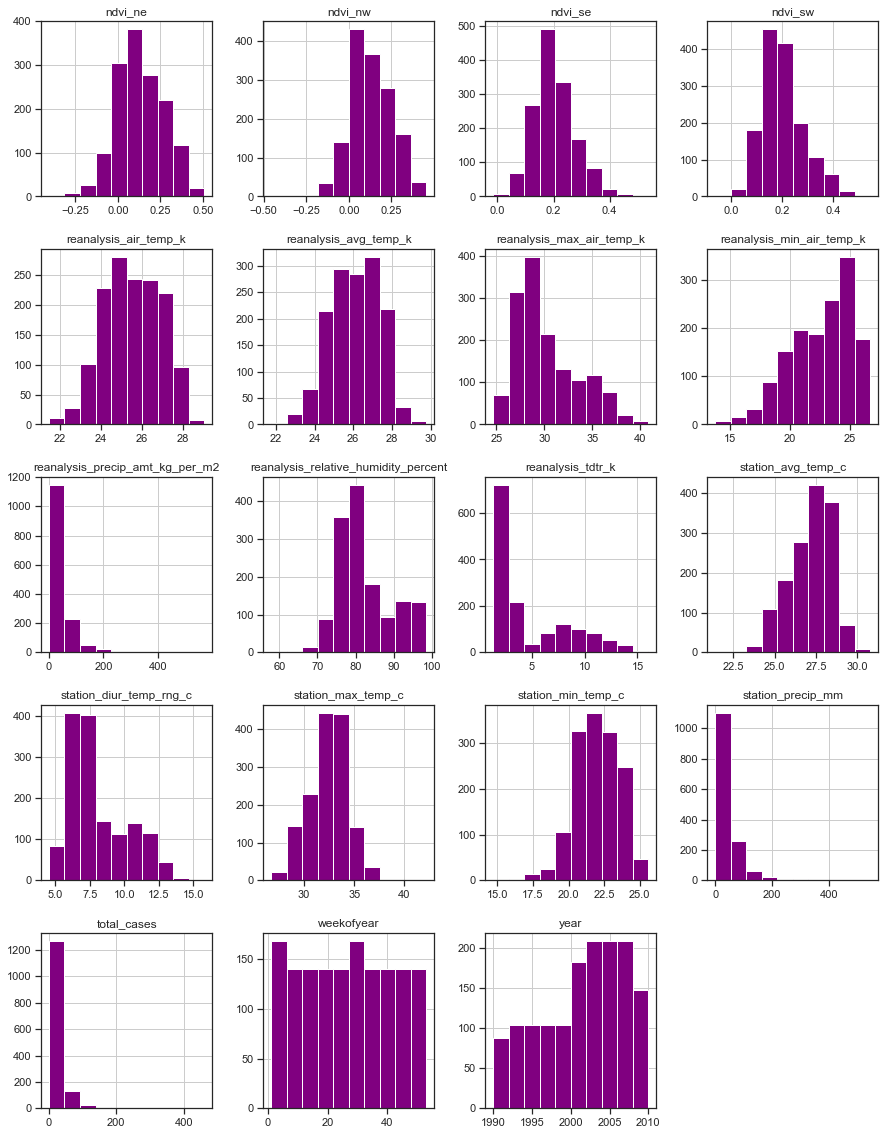

In [33]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df_training_full_1_1.hist(bins=10, ax=ax, color='purple')
plt.show()

In [34]:
print(df_training_full_1_1.var())

year                                      29.249860
weekofyear                               225.583493
total_cases                             1900.611230
ndvi_ne                                    0.019190
ndvi_nw                                    0.014295
ndvi_se                                    0.005537
ndvi_sw                                    0.006988
reanalysis_air_temp_k                      1.854909
reanalysis_avg_temp_k                      1.594351
reanalysis_max_air_temp_k                 10.452485
reanalysis_min_air_temp_k                  6.550518
reanalysis_precip_amt_kg_per_m2         1877.417303
reanalysis_relative_humidity_percent      51.280154
reanalysis_tdtr_k                         12.548169
station_avg_temp_c                         1.640604
station_diur_temp_rng_c                    4.506434
station_max_temp_c                         3.844615
station_min_temp_c                         2.462117
station_precip_mm                       2243.282694
dtype: float

In [35]:
df_training_full_2=df_training_full_1_1.drop(['reanalysis_precip_amt_kg_per_m2', 'station_precip_mm'],axis=1)

In [36]:
df_training_full_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1455
Data columns (total 19 columns):
city                                    1456 non-null object
year                                    1456 non-null int64
weekofyear                              1456 non-null int64
total_cases                             1456 non-null int64
week_start_date                         1456 non-null object
ndvi_ne                                 1456 non-null float64
ndvi_nw                                 1456 non-null float64
ndvi_se                                 1456 non-null float64
ndvi_sw                                 1456 non-null float64
reanalysis_air_temp_k                   1456 non-null float64
reanalysis_avg_temp_k                   1456 non-null float64
reanalysis_max_air_temp_k               1456 non-null float64
reanalysis_min_air_temp_k               1456 non-null float64
reanalysis_relative_humidity_percent    1456 non-null float64
reanalysis_tdtr_k                

### Splitting City Dataframes

In [37]:
df_training_full_2=df_training_full_2.drop_duplicates()
df_training_full_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1455
Data columns (total 19 columns):
city                                    1456 non-null object
year                                    1456 non-null int64
weekofyear                              1456 non-null int64
total_cases                             1456 non-null int64
week_start_date                         1456 non-null object
ndvi_ne                                 1456 non-null float64
ndvi_nw                                 1456 non-null float64
ndvi_se                                 1456 non-null float64
ndvi_sw                                 1456 non-null float64
reanalysis_air_temp_k                   1456 non-null float64
reanalysis_avg_temp_k                   1456 non-null float64
reanalysis_max_air_temp_k               1456 non-null float64
reanalysis_min_air_temp_k               1456 non-null float64
reanalysis_relative_humidity_percent    1456 non-null float64
reanalysis_tdtr_k                

In [38]:
pd.isnull(df_training_full_2).any()

city                                    False
year                                    False
weekofyear                              False
total_cases                             False
week_start_date                         False
ndvi_ne                                 False
ndvi_nw                                 False
ndvi_se                                 False
ndvi_sw                                 False
reanalysis_air_temp_k                   False
reanalysis_avg_temp_k                   False
reanalysis_max_air_temp_k               False
reanalysis_min_air_temp_k               False
reanalysis_relative_humidity_percent    False
reanalysis_tdtr_k                       False
station_avg_temp_c                      False
station_diur_temp_rng_c                 False
station_max_temp_c                      False
station_min_temp_c                      False
dtype: bool

In [39]:
df_training_full_2.city.value_counts()

sj    936
iq    520
Name: city, dtype: int64

In [40]:
# Splitting both Cities data in different df
df_training_full_2_sj = df_training_full_2[df_training_full_2.city =="sj"]
df_training_full_2_iq = df_training_full_2[df_training_full_2.city =="iq"]

In [41]:
df_training_full_2_sj.head(20)

,city,year,weekofyear,total_cases,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_relative_humidity_percent,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c
0,sj,1990,18,4,1990-04-30,0.122600,0.103725,0.198483,0.177617,24.422857,24.592857,26.65,22.75,73.365714,2.628571,25.442857,6.900000,29.4,20.0
1,sj,1990,19,5,1990-05-07,0.169900,0.142175,0.162357,0.155486,25.061429,25.292857,27.75,23.25,77.368571,2.371429,26.714286,6.371429,31.7,22.2
2,sj,1990,20,4,1990-05-14,0.032250,0.172967,0.157200,0.170843,25.631429,25.728571,27.35,24.15,82.052857,2.300000,26.714286,6.485714,32.2,22.8
3,sj,1990,21,3,1990-05-21,0.128633,0.245067,0.227557,0.235886,25.837143,26.078571,28.25,23.85,80.337143,2.428571,27.471429,6.771429,33.3,23.3
4,sj,1990,22,6,1990-05-28,0.196200,0.262200,0.251200,0.247340,26.368571,26.514286,28.75,24.35,80.460000,3.014286,28.942857,9.371429,35.0,23.9
5,sj,1990,23,2,1990-06-04,0.196200,0.174850,0.254314,0.181743,26.480000,26.614286,29.25,24.95,79.891429,2.100000,28.114286,6.942857,34.4,23.9
6,sj,1990,24,4,1990-06-11,0.112900,0.092800,0.205071,0.210271,26.057143,26.071429,28.15,24.55,82.000000,2.042857,27.414286,6.771429,32.2,23.3
7,sj,1990,25,5,1990-06-18,0.072500,0.072500,0.151471,0.133029,26.441429,26.378571,27.45,25.25,83.375714,1.571429,28.371429,7.685714,33.9,22.8
8,sj,1990,26,10,1990-06-25,0.102450,0.146175,0.125571,0.123600,26.428571,26.407143,28.95,24.55,82.768571,1.885714,28.328571,7.385714,33.9,22.8
9,sj,1990,27,6,1990-07-02,0.102450,0.121550,0.160683,0.202567,27.004286,27.128571,29.15,25.55,81.281429,2.014286,28.328571,6.514286,33.9,24.4


In [42]:
df_training_full_2_sj.year.unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008], dtype=int64)

In [43]:
df_training_full_2_iq.head(20)

,city,year,weekofyear,total_cases,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_relative_humidity_percent,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c
936,iq,2000,26,0,2000-07-01,0.192886,0.132257,0.340886,0.247200,23.590000,25.300000,34.15,19.95,92.418571,8.928571,26.400000,10.775000,32.5,20.7
937,iq,2000,27,0,2000-07-08,0.216833,0.276100,0.289457,0.241657,23.484286,25.278571,33.45,17.95,93.581429,10.314286,26.900000,11.566667,34.0,20.8
938,iq,2000,28,0,2000-07-15,0.176757,0.173129,0.204114,0.128014,23.265714,24.242857,31.35,19.45,95.848571,7.385714,26.800000,11.466667,33.0,20.7
939,iq,2000,29,0,2000-07-22,0.227729,0.145429,0.254200,0.200314,22.207143,23.078571,30.45,15.45,87.234286,9.114286,25.766667,10.533333,31.5,14.7
940,iq,2000,30,0,2000-07-29,0.328643,0.322129,0.254371,0.361043,23.282857,24.485714,33.85,18.35,88.161429,9.500000,26.600000,11.480000,33.3,19.1
941,iq,2000,31,0,2000-08-05,0.205529,0.190757,0.231671,0.255314,24.041429,25.135714,33.05,15.35,74.728571,13.771429,25.340000,10.940000,32.0,17.0
942,iq,2000,32,0,2000-08-12,0.312486,0.329986,0.380586,0.387271,24.170000,25.828571,35.65,18.95,83.275714,11.471429,27.016667,11.650000,34.0,19.9
943,iq,2000,33,0,2000-08-19,0.384133,0.392240,0.341780,0.382750,24.477143,26.185714,34.75,17.45,82.490000,13.700000,26.583333,10.316667,33.0,20.5
944,iq,2000,34,0,2000-08-26,0.408157,0.322157,0.406714,0.302714,25.088571,26.421429,36.95,18.15,74.740000,13.771429,26.900000,13.400000,34.0,19.0
945,iq,2000,35,0,2000-09-02,0.332043,0.321057,0.314614,0.324257,26.068571,27.778571,37.35,19.75,74.151429,12.457143,27.116667,12.266667,34.0,20.0


In [44]:
df_training_full_2_iq.year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010],
      dtype=int64)

In [45]:
print('San Juan')
print('mean: ', df_training_full_2_sj.total_cases.mean())
print('var :', df_training_full_2_sj.total_cases.var())

print('\nIquitos')
print('mean: ', df_training_full_2_iq.total_cases.mean())
print('var :', df_training_full_2_iq.total_cases.var())

San Juan
mean:  34.18055555555556
var : 2640.045439691045

Iquitos
mean:  7.565384615384615
var : 115.89552393656412


#### variance >> mean suggests total_cases can be described by a negative binomial distribution

- General incubation period of virus is 4-7 days so it is assumed that the number of cases in a given week are related to previous week. 

- Experiment: Data shifted (# of cases) by 1 and 2 weeks)

In [46]:
# Shifting the Total cases by 1 week because of the incubation period of virus- for final model went with this
df_training_full_2_iq = df_training_full_2_iq.assign(Lag_by_1_Week=df_training_full_2_iq['total_cases'].shift(-1))
df_training_full_2_iq = df_training_full_2_iq.apply(lambda x: x.fillna(method='ffill'))
df_training_full_2_iq['Lag_by_1_Week'] = df_training_full_2_iq['Lag_by_1_Week'].astype(int)

In [47]:
# Shifting the Total cases by 2 week because of the incubation period of virus- tried this as well but shift by 1 week gave better MAE
df_training_full_2_iq = df_training_full_2_iq.assign(Lag_by_2_Weeks=df_training_full_2_iq['total_cases'].shift(-2))
df_training_full_2_iq = df_training_full_2_iq.apply(lambda x: x.fillna(method='ffill'))
df_training_full_2_iq['Lag_by_2_Weeks'] = df_training_full_2_iq['Lag_by_2_Weeks'].astype(int)

In [48]:
df_training_full_2_iq.head()

,city,year,weekofyear,total_cases,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_relative_humidity_percent,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,Lag_by_1_Week,Lag_by_2_Weeks
936,iq,2000,26,0,2000-07-01,0.192886,0.132257,0.340886,0.247200,23.590000,25.300000,34.15,19.95,92.418571,8.928571,26.400000,10.775000,32.5,20.7,0,0
937,iq,2000,27,0,2000-07-08,0.216833,0.276100,0.289457,0.241657,23.484286,25.278571,33.45,17.95,93.581429,10.314286,26.900000,11.566667,34.0,20.8,0,0
938,iq,2000,28,0,2000-07-15,0.176757,0.173129,0.204114,0.128014,23.265714,24.242857,31.35,19.45,95.848571,7.385714,26.800000,11.466667,33.0,20.7,0,0
939,iq,2000,29,0,2000-07-22,0.227729,0.145429,0.254200,0.200314,22.207143,23.078571,30.45,15.45,87.234286,9.114286,25.766667,10.533333,31.5,14.7,0,0
940,iq,2000,30,0,2000-07-29,0.328643,0.322129,0.254371,0.361043,23.282857,24.485714,33.85,18.35,88.161429,9.500000,26.600000,11.480000,33.3,19.1,0,0


In [49]:
df_training_full_2_iq.total_cases.unique()

array([  0,   1,   2,   4,  11,  16,  23,  12,  14,  18,   8,   7,  10,
         5,  13,   9,  22,   3,   6,  17,  21,  31,  25,  28,  26,  27,
        38,  29,  19,  37,  33,  83, 116,  32,  39,  20,  24,  58,  35,
        45,  34,  63,  44,  50,  15,  30], dtype=int64)

In [173]:
df_training_full_2_iq.total_cases.value_counts()

0      96
1      47
2      46
5      44
3      36
6      36
4      28
7      24
9      21
8      20
11     17
10     11
12      9
16      8
13      7
18      6
21      5
14      4
29      4
28      4
26      4
25      4
20      3
17      3
19      3
22      3
35      3
23      3
37      2
15      2
38      2
63      1
58      1
50      1
45      1
44      1
39      1
83      1
34      1
33      1
32      1
31      1
30      1
27      1
24      1
116     1
Name: total_cases, dtype: int64

In [50]:
# Shifting the Total cases by 1 week because of the incubation period of virus- for final model went with this
df_training_full_2_sj= df_training_full_2_sj.assign(Lag_by_1_Week=df_training_full_2_sj['total_cases'].shift(-1))
df_training_full_2_sj = df_training_full_2_sj.apply(lambda x: x.fillna(method='ffill'))
df_training_full_2_sj['Lag_by_1_Week'] = df_training_full_2_sj['Lag_by_1_Week'].astype(int)

In [51]:
# Shifting the Total cases by 2 week because of the incubation period of virus- tried this as well but shift by 1 week gave better MAE
df_training_full_2_sj= df_training_full_2_sj.assign(Lag_by_2_Weeks=df_training_full_2_sj['total_cases'].shift(-2))
df_training_full_2_sj = df_training_full_2_sj.apply(lambda x: x.fillna(method='ffill'))
df_training_full_2_sj['Lag_by_2_Weeks'] = df_training_full_2_sj['Lag_by_2_Weeks'].astype(int)

In [52]:
df_training_full_2_sj.head()

,city,year,weekofyear,total_cases,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_relative_humidity_percent,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,Lag_by_1_Week,Lag_by_2_Weeks
0,sj,1990,18,4,1990-04-30,0.122600,0.103725,0.198483,0.177617,24.422857,24.592857,26.65,22.75,73.365714,2.628571,25.442857,6.900000,29.4,20.0,5,4
1,sj,1990,19,5,1990-05-07,0.169900,0.142175,0.162357,0.155486,25.061429,25.292857,27.75,23.25,77.368571,2.371429,26.714286,6.371429,31.7,22.2,4,3
2,sj,1990,20,4,1990-05-14,0.032250,0.172967,0.157200,0.170843,25.631429,25.728571,27.35,24.15,82.052857,2.300000,26.714286,6.485714,32.2,22.8,3,6
3,sj,1990,21,3,1990-05-21,0.128633,0.245067,0.227557,0.235886,25.837143,26.078571,28.25,23.85,80.337143,2.428571,27.471429,6.771429,33.3,23.3,6,2
4,sj,1990,22,6,1990-05-28,0.196200,0.262200,0.251200,0.247340,26.368571,26.514286,28.75,24.35,80.460000,3.014286,28.942857,9.371429,35.0,23.9,2,4


In [53]:
df_training_full_2_sj.total_cases.unique()

array([  4,   5,   3,   6,   2,  10,   8,  17,  23,  13,  21,  28,  24,
        20,  40,  27,  42,  33,  43,  37,  57,  71,  44,  56,  53,  52,
        47,  26,  34,  19,  25,  18,  16,  15,  12,  14,  62,  60,  76,
        66,  64,  68,  89,  92, 140, 116, 142, 129, 127, 169, 141, 108,
        78,  70,  81, 104,  90,  85,  55,  65,  38,  59,  29,  30,  31,
        32,  35,  67,  74,  61,  36,  22,  11,   7,  46,  39,  49,  80,
        84,  72, 115, 179, 202, 272, 302, 395, 426, 461, 381, 333, 353,
       410, 364, 359, 288, 221, 149, 112, 154,  91,   9,  48,  50,  75,
        63,  41,  51, 102, 128, 150, 191, 256, 329, 263, 220, 204, 181,
        99,  54,  73,  77,  45,   1,   0,  83,  82, 126, 119, 137, 131,
       106, 101, 170, 135], dtype=int64)

In [172]:
df_training_full_2_sj.total_cases.value_counts()

6      35
3      34
7      34
17     33
4      28
       ..
131     1
135     1
137     1
141     1
461     1
Name: total_cases, Length: 134, dtype: int64

### -------------------------------------------------------------------------------------------------------------

- Using Pycaret library to do a quick comparison between different ML algos to evaluate which model to select.

### Using Pycaret

In [129]:
from pycaret.regression import *

#### For SJ

In [132]:
cols = df_training_full_2_sj.columns.tolist()
cols.remove('city')
cols.remove('total_cases')
cols.remove('week_start_date')
cols.remove('Lag_by_1_Week')
cols.remove('Lag_by_2_Weeks')

In [133]:
exp_reg_sj = setup(data = df_training_full_2_sj, target = 'Lag_by_1_Week', numeric_features= cols,
                   session_id=123, ignore_features=['city','total_cases','week_start_date','Lag_by_2_Weeks'], 
                   remove_multicollinearity= True, normalize= True)

,Description,Value
0,session_id,123
1,Target,Lag_by_1_Week
2,Original Data,"(936, 21)"
3,Missing Values,False
4,Numeric Features,16
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(655, 14)"


In [1]:
best=compare_models()

In [73]:
cat_boost = create_model('catboost')
print(cat_boost)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,16.01,719.9,26.83,0.7612,-0,0.7334
1,11.78,259.7,16.12,0.868,-0,0.6448
2,12.17,321.9,17.94,0.4194,-0,0.8963
3,18.64,1698,41.2,0.6593,-0,0.8406
4,10.59,281.5,16.78,0.8706,-0,0.8407
5,14.01,516.9,22.74,0.755,-0,0.6825
6,16.3,792.5,28.15,0.4177,-0,0.9857
7,17.76,1232,35.1,0.4172,-0,0.7863
8,10.26,243.9,15.62,0.6644,-0,0.8842
9,10.9,257.1,16.04,0.5989,-0,0.8201


In [74]:
tuned_catboost = tune_model(cat_boost)

In [2]:
plot_model(cat_boost, plot = 'learning')

In [3]:
plot_model(cat_boost, plot = 'error')

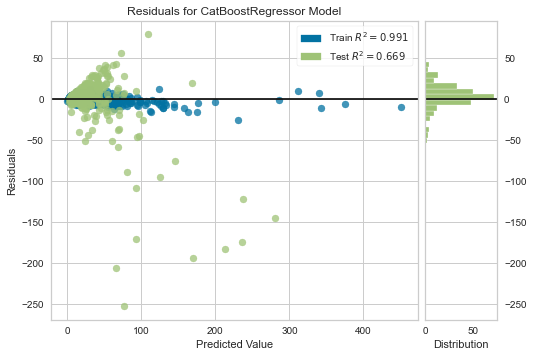

In [78]:
plot_model(cat_boost)

### ----------------------------------------------------------------------------------------------------

## Prepare X (feature) and y (target) variables

In [54]:
X_iq=df_training_full_2_iq.drop(['city','total_cases','week_start_date','Lag_by_2_Weeks','Lag_by_1_Week'], axis=1)
Y_iq=df_training_full_2_iq['Lag_by_1_Week'].values

In [55]:
X_iq.head()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_relative_humidity_percent,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c
936,2000,26,0.192886,0.132257,0.340886,0.247200,23.590000,25.300000,34.15,19.95,92.418571,8.928571,26.400000,10.775000,32.5,20.7
937,2000,27,0.216833,0.276100,0.289457,0.241657,23.484286,25.278571,33.45,17.95,93.581429,10.314286,26.900000,11.566667,34.0,20.8
938,2000,28,0.176757,0.173129,0.204114,0.128014,23.265714,24.242857,31.35,19.45,95.848571,7.385714,26.800000,11.466667,33.0,20.7
939,2000,29,0.227729,0.145429,0.254200,0.200314,22.207143,23.078571,30.45,15.45,87.234286,9.114286,25.766667,10.533333,31.5,14.7
940,2000,30,0.328643,0.322129,0.254371,0.361043,23.282857,24.485714,33.85,18.35,88.161429,9.500000,26.600000,11.480000,33.3,19.1


In [56]:
Y_iq.shape

(520,)

In [57]:
X_sj=df_training_full_2_sj.drop(['city','total_cases','week_start_date','Lag_by_2_Weeks', 'Lag_by_1_Week'], axis=1)
Y_sj=df_training_full_2_sj['Lag_by_1_Week'].values

In [58]:
X_sj.head()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_relative_humidity_percent,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c
0,1990,18,0.122600,0.103725,0.198483,0.177617,24.422857,24.592857,26.65,22.75,73.365714,2.628571,25.442857,6.900000,29.4,20.0
1,1990,19,0.169900,0.142175,0.162357,0.155486,25.061429,25.292857,27.75,23.25,77.368571,2.371429,26.714286,6.371429,31.7,22.2
2,1990,20,0.032250,0.172967,0.157200,0.170843,25.631429,25.728571,27.35,24.15,82.052857,2.300000,26.714286,6.485714,32.2,22.8
3,1990,21,0.128633,0.245067,0.227557,0.235886,25.837143,26.078571,28.25,23.85,80.337143,2.428571,27.471429,6.771429,33.3,23.3
4,1990,22,0.196200,0.262200,0.251200,0.247340,26.368571,26.514286,28.75,24.35,80.460000,3.014286,28.942857,9.371429,35.0,23.9


In [59]:
Y_sj.shape

(936,)

### Splitting in Train and Test sets

In [315]:
from sklearn.model_selection import train_test_split
X_train_iq, X_test_iq, y_train_iq, y_test_iq = train_test_split(X_iq, Y_iq, test_size=0.2, random_state=44)
X_train_iq.shape

(416, 16)

In [316]:
X_test_iq.shape

(104, 16)

In [317]:
X_train_sj, X_test_sj, y_train_sj, y_test_sj = train_test_split(X_sj, Y_sj, test_size=0.25, random_state=44)
X_train_sj.shape

(702, 16)

In [318]:
X_test_sj.shape

(234, 16)

### Preprocessing

In [319]:
# By using RobustScaler(), we can remove the outliers and then use either StandardScaler or MinMaxScaler for preprocessing the dataset.
from sklearn.preprocessing import RobustScaler

r_scaler = RobustScaler()

r_scaler.fit(X_train_iq)
r_scaler.fit(X_train_sj)

X_train_iq= r_scaler.transform(X_train_iq)
X_train_sj= r_scaler.transform(X_train_sj)

X_test_iq= r_scaler.transform(X_test_iq)
X_test_sj= r_scaler.transform(X_test_sj)

In [321]:
# Importing the StandardScalar class from the sklearn.preprocessing module
from sklearn.preprocessing import StandardScaler

#Instansiating a StandardScaler object
scaler = StandardScaler()

#Scaling ONLY the training data first
scaler.fit(X_train_iq)
scaler.fit(X_train_sj)

X_train_iq= scaler.transform(X_train_iq)
X_train_sj= scaler.transform(X_train_sj)

X_test_iq= scaler.transform(X_test_iq)
X_test_sj= scaler.transform(X_test_sj)

# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# scaler.fit(X_train_iq)
# scaler.fit(X_train_sj)

# X_train_iq = scaler.transform(X_train_iq)
# X_train_sj = scaler.transform(X_train_sj)

# X_test_iq = scaler.transform(X_test_iq)
# X_test_sj = scaler.transform(X_test_sj)

### -----------------------------------------------------------------------------------------------------------------------

- Quickly trying out MLP Regressor from sklearn.neural_network-- Did not get a better MAE compared to GB Regressor

In [82]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(solver='lbfgs', hidden_layer_sizes=50, max_iter=200,random_state=1)
mlp.fit(X_train_iq, y_train_iq)
predicted_iq=mlp.predict(X_test_iq)

In [83]:
result_iq = mean_absolute_error(y_test_iq, predicted_iq)
result_MSE_iq = math.sqrt(mean_squared_error(y_test_iq, predicted_iq))
result_iq,result_MSE_iq

In [84]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(solver='lbfgs', hidden_layer_sizes=50, max_iter=200,random_state=1)
mlp.fit(X_train_sj, y_train_sj)
predicted_sj=mlp.predict(X_test_sj)

In [85]:
result_sj = mean_absolute_error(y_test_sj, predicted_sj)
result_MSE_sj = math.sqrt(mean_squared_error(y_test_sj, predicted_sj))
result_sj,result_MSE_sj

### --------------------------------------------------------------------------------------------------

### Gradient Boosting-IQ

In [322]:
from sklearn import ensemble

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf_iq = ensemble.GradientBoostingRegressor(**params)

clf_iq.fit(X_train_iq, y_train_iq)
Predicted_Gradient_Boosting_iq = clf_iq.predict(X_test_iq)

In [323]:
# Predicted_Gradient_Boosting_iq=np.ceil(Predicted_Gradient_Boosting_iq)
# Predicted_Gradient_Boosting_iq=Predicted_Gradient_Boosting_iq.astype(int)

In [324]:
# (Predicted_Gradient_Boosting_iq==y_test_iq).sum()/len(y_test_iq)

In [325]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

MSE_Gradient_Boosting_iq = math.sqrt(mean_squared_error(y_test_iq, Predicted_Gradient_Boosting_iq ))
print(MSE_Gradient_Boosting_iq)

6.607694373243696


In [326]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

MAE_Gradient_Boosting_iq = mean_absolute_error(y_test_iq, Predicted_Gradient_Boosting_iq )
print(MAE_Gradient_Boosting_iq)

4.501025365356715


<Figure size 432x288 with 0 Axes>

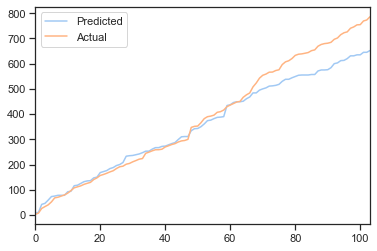

In [327]:
import numpy as np
y_test_np_array_iq = np.array(y_test_iq) 
y_predicted_np_array_iq = np.array(Predicted_Gradient_Boosting_iq ) 
df = pd.DataFrame(y_test_np_array_iq,columns=['Predicted'])
df1 = df.cumsum()

df2 = pd.DataFrame(y_predicted_np_array_iq, columns=['Actual'])

df3 = df2.cumsum()
plt.figure();

ax=df1.plot();
df3.plot(ax=ax);
plt.show();

In [328]:
import joblib
filename = 'finalized_GB_model_IQ.sav'
joblib.dump(clf_iq, filename)

['finalized_GB_model_IQ.sav']

### Gradient Boosting-SJ

In [329]:
from sklearn import ensemble

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf_sj = ensemble.GradientBoostingRegressor(**params)

clf_sj.fit(X_train_sj, y_train_sj)
Predicted_Gradient_Boosting_sj = clf_sj.predict(X_test_sj)

In [330]:
# Predicted_Gradient_Boosting_sj=np.ceil(Predicted_Gradient_Boosting_sj)
# Predicted_Gradient_Boosting_sj=Predicted_Gradient_Boosting_sj.astype(int)

In [331]:
# (Predicted_Gradient_Boosting_sj==y_test_sj).sum()/len(y_test_sj)

In [332]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

MSE_Gradient_Boosting_sj = math.sqrt(mean_squared_error(y_test_sj, Predicted_Gradient_Boosting_sj ))
print(MSE_Gradient_Boosting_sj)

33.97084958040408


In [333]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

MAE_Gradient_Boosting_sj = mean_absolute_error(y_test_sj, Predicted_Gradient_Boosting_sj )
print(MAE_Gradient_Boosting_sj)

16.843399986460714


<Figure size 432x288 with 0 Axes>

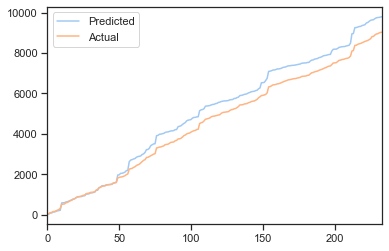

In [334]:
import numpy as np
y_test_np_array_sj = np.array(y_test_sj) 
y_predicted_np_array_sj = np.array(Predicted_Gradient_Boosting_sj ) 
df_4= pd.DataFrame(y_test_np_array_sj,columns=['Predicted'])
df5 = df_4.cumsum()

df6 = pd.DataFrame(y_predicted_np_array_sj, columns=['Actual'])

df7 = df6.cumsum()
plt.figure();

ax=df5.plot();
df7.plot(ax=ax);
plt.show();

In [335]:
filename = 'finalized_GB_model_SJ.sav'
joblib.dump(clf_sj, filename)

['finalized_GB_model_SJ.sav']

### Test Set

In [336]:
df_test_features=pd.read_csv('dengue_features_test.csv')
df_test_features.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [337]:
df_test_features.tail()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
411,iq,2013,22,2013-05-28,0.301471,0.380029,0.280629,0.383186,41.12,297.774286,...,67.60,89.990000,41.12,17.185714,10.100000,27.40,9.050,32.6,21.8,33.0
412,iq,2013,23,2013-06-04,0.247600,0.296343,0.285371,0.350357,71.52,297.167143,...,45.70,93.891429,71.52,17.448571,9.657143,27.52,10.720,33.8,21.4,68.0
413,iq,2013,24,2013-06-11,0.238729,0.251029,0.252586,0.249771,78.96,295.831429,...,45.22,94.967143,78.96,16.410000,7.385714,27.20,10.075,32.6,21.6,93.2
414,iq,2013,25,2013-06-18,0.310429,0.302700,0.406614,0.403943,39.54,295.778571,...,4.70,89.057143,39.54,15.137143,8.228571,26.70,8.480,32.2,21.8,34.1
415,iq,2013,26,2013-06-25,0.339467,0.240071,0.356943,0.273600,51.80,297.372857,...,27.80,87.030000,51.80,16.148571,11.542857,27.35,9.675,32.6,22.0,14.9


In [338]:
df_test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 24 columns):
city                                     416 non-null object
year                                     416 non-null int64
weekofyear                               416 non-null int64
week_start_date                          416 non-null object
ndvi_ne                                  373 non-null float64
ndvi_nw                                  405 non-null float64
ndvi_se                                  415 non-null float64
ndvi_sw                                  415 non-null float64
precipitation_amt_mm                     414 non-null float64
reanalysis_air_temp_k                    414 non-null float64
reanalysis_avg_temp_k                    414 non-null float64
reanalysis_dew_point_temp_k              414 non-null float64
reanalysis_max_air_temp_k                414 non-null float64
reanalysis_min_air_temp_k                414 non-null float64
reanalysis_precip_amt_kg_per_m2  

In [339]:
pd.isnull(df_test_features).any()

city                                     False
year                                     False
weekofyear                               False
week_start_date                          False
ndvi_ne                                   True
ndvi_nw                                   True
ndvi_se                                   True
ndvi_sw                                   True
precipitation_amt_mm                      True
reanalysis_air_temp_k                     True
reanalysis_avg_temp_k                     True
reanalysis_dew_point_temp_k               True
reanalysis_max_air_temp_k                 True
reanalysis_min_air_temp_k                 True
reanalysis_precip_amt_kg_per_m2           True
reanalysis_relative_humidity_percent      True
reanalysis_sat_precip_amt_mm              True
reanalysis_specific_humidity_g_per_kg     True
reanalysis_tdtr_k                         True
station_avg_temp_c                        True
station_diur_temp_rng_c                   True
station_max_t

In [340]:
df_test_features.year.unique()

array([2008, 2009, 2010, 2011, 2012, 2013], dtype=int64)

In [341]:
df_test_features.shape

(416, 24)

In [342]:
df_test_features.isna().sum()/len(df_test_features)*100

city                                      0.000000
year                                      0.000000
weekofyear                                0.000000
week_start_date                           0.000000
ndvi_ne                                  10.336538
ndvi_nw                                   2.644231
ndvi_se                                   0.240385
ndvi_sw                                   0.240385
precipitation_amt_mm                      0.480769
reanalysis_air_temp_k                     0.480769
reanalysis_avg_temp_k                     0.480769
reanalysis_dew_point_temp_k               0.480769
reanalysis_max_air_temp_k                 0.480769
reanalysis_min_air_temp_k                 0.480769
reanalysis_precip_amt_kg_per_m2           0.480769
reanalysis_relative_humidity_percent      0.480769
reanalysis_sat_precip_amt_mm              0.480769
reanalysis_specific_humidity_g_per_kg     0.480769
reanalysis_tdtr_k                         0.480769
station_avg_temp_c             

In [343]:
df_test_features_1= df_test_features.apply(lambda x: x.fillna(method='ffill'))
pd.isnull(df_test_features_1).any()

city                                     False
year                                     False
weekofyear                               False
week_start_date                          False
ndvi_ne                                  False
ndvi_nw                                  False
ndvi_se                                  False
ndvi_sw                                  False
precipitation_amt_mm                     False
reanalysis_air_temp_k                    False
reanalysis_avg_temp_k                    False
reanalysis_dew_point_temp_k              False
reanalysis_max_air_temp_k                False
reanalysis_min_air_temp_k                False
reanalysis_precip_amt_kg_per_m2          False
reanalysis_relative_humidity_percent     False
reanalysis_sat_precip_amt_mm             False
reanalysis_specific_humidity_g_per_kg    False
reanalysis_tdtr_k                        False
station_avg_temp_c                       False
station_diur_temp_rng_c                  False
station_max_t

In [344]:
# Kelvin to celsius 
conv_features=["reanalysis_air_temp_k", "reanalysis_avg_temp_k","reanalysis_dew_point_temp_k",
            "reanalysis_max_air_temp_k","reanalysis_min_air_temp_k"]
for i in conv_features:
    df_test_features_1[i] = df_test_features_1[i] - 273.15

In [345]:
df_testing_full_2=df_test_features_1.drop(['precipitation_amt_mm', 'reanalysis_dew_point_temp_k', 
                                              'reanalysis_sat_precip_amt_mm', 'reanalysis_specific_humidity_g_per_kg', 
                                              'reanalysis_precip_amt_kg_per_m2', 'station_precip_mm','week_start_date'],axis=1)

In [346]:
df_testing_full_2=df_testing_full_2.drop_duplicates()
df_testing_full_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 416 entries, 0 to 415
Data columns (total 17 columns):
city                                    416 non-null object
year                                    416 non-null int64
weekofyear                              416 non-null int64
ndvi_ne                                 416 non-null float64
ndvi_nw                                 416 non-null float64
ndvi_se                                 416 non-null float64
ndvi_sw                                 416 non-null float64
reanalysis_air_temp_k                   416 non-null float64
reanalysis_avg_temp_k                   416 non-null float64
reanalysis_max_air_temp_k               416 non-null float64
reanalysis_min_air_temp_k               416 non-null float64
reanalysis_relative_humidity_percent    416 non-null float64
reanalysis_tdtr_k                       416 non-null float64
station_avg_temp_c                      416 non-null float64
station_diur_temp_rng_c                 416 no

In [347]:
df_testing_full_2.city.value_counts()

sj    260
iq    156
Name: city, dtype: int64

In [348]:
# Separating the city df for test dataset
df_testing_full_2_sj = df_testing_full_2[df_testing_full_2.city =="sj"].reset_index().drop(['index'], axis=1)
df_testing_full_2_iq = df_testing_full_2[df_testing_full_2.city =="iq"].reset_index().drop(['index'], axis=1)

In [349]:
df_testing_full_2_iq.shape

(156, 17)

In [350]:
df_testing_full_2_sj.shape

(260, 17)

In [351]:
df_testing_full_2_iq.head()

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_relative_humidity_percent,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c
0,iq,2010,26,0.183783,0.142500,0.225129,0.150214,24.498571,26.064286,34.75,20.55,92.581429,9.428571,27.440,10.760,33.8,21.5
1,iq,2010,27,0.291657,0.272267,0.330700,0.320914,25.074286,26.314286,34.55,19.05,83.885714,10.157143,27.025,9.625,33.0,21.2
2,iq,2010,28,0.208543,0.366457,0.212629,0.255514,24.805714,25.814286,33.25,19.35,92.057143,9.557143,26.950,10.350,33.4,21.6
3,iq,2010,29,0.089286,0.063214,0.122057,0.081957,22.565714,23.492857,33.25,16.15,88.970000,7.828571,26.900,9.700,33.3,14.2
4,iq,2010,30,0.306100,0.327683,0.250086,0.267914,25.352857,26.850000,34.95,17.35,78.610000,11.771429,27.050,11.850,33.5,16.9


In [352]:
X_sj_testing=df_testing_full_2_sj.drop(['city'], axis=1)
X_iq_testing=df_testing_full_2_iq.drop(['city'], axis=1)

In [353]:
X_iq_testing.shape

(156, 16)

In [354]:
X_sj_testing.shape

(260, 16)

In [355]:
import pickle
import joblib

# filename = 'finalized_GB_model_IQ.sav'
model_1=joblib.load('finalized_GB_model_IQ.sav')

In [356]:
result_iq= model_1.predict(X_iq_testing).astype(int)
print(result_iq)

[42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42
 42 42 44 37 42 42 42 42 42 42 42 42 42 42 42 42 42 44 44 42 42 44 44 42
 42 44 42 44 42 42 42 42 42 42 42 42 42 42 42 42 42 40 42 42 42 42 42 42
 42 42 42 42 42 42 42 39 42 42 42 42 44 42 42 42 42 42 42 42 44 42 42 42
 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42
 42 42 42 42 42 41 42 42 42 42 37 40 40 42 39 42 42 42 42 42 42 42 42 42
 42 42 42 42 42 42 42 42 42 42 42 42]


In [357]:
len(result_iq)

156

In [358]:
len(pd.Series(df_testing_full_2_iq.weekofyear))

156

In [359]:
result_iq_1=pd.concat([pd.Series(df_testing_full_2_iq.city), pd.Series(df_testing_full_2_iq.year),pd.Series(df_testing_full_2_iq.weekofyear)], axis=1, sort=False)
result_iq_1.head()

,city,year,weekofyear
0,iq,2010,26
1,iq,2010,27
2,iq,2010,28
3,iq,2010,29
4,iq,2010,30


In [360]:
result_iq_1.shape

(156, 3)

In [361]:
result_iq_1['total_cases']=result_iq[:]
result_iq_1.head()

,city,year,weekofyear,total_cases
0,iq,2010,26,42
1,iq,2010,27,42
2,iq,2010,28,42
3,iq,2010,29,42
4,iq,2010,30,42


In [362]:
result_iq_1.shape

(156, 4)

In [363]:
import pickle
import joblib

# filename = 'finalized_GB_model_SJ.sav'
model_2=joblib.load('finalized_GB_model_SJ.sav')

In [364]:
result_sj= model_2.predict(X_sj_testing).astype(int)
print(result_sj)

[158 158 177 177 177 161 161 180 158 157 142 161 156 158 156 156 156 156
 157 156 156 157 169 156 156 161 156 169 157 156 157 169 138 138 158 145
 166 138 157 157 158 157 157 156 157 138 158 187 156 161 162 159 157 157
 137 138 157 158 158 157 158 180 157 157 158 156 158 157 157 157 158 157
 157 162 162 155 156 162 162 162 160 157 158 156 158 137 162 162 145 158
 137 156 138 177 176 158 177 157 169 177 162 162 158 157 166 159 158 157
 157 157 161 161 157 162 158 156 158 156 158 158 169 157 158 156 158 157
 156 156 156 181 162 166 138 166 166 143 157 184 158 138 127 139 169 169
 162 162 162 161 158 169 166 166 162 157 157 157 160 142 143 162 157 138
 139 138 138 137 139 140 139 158 139 139 157 137 161 161 156 158 166 160
 157 158 158 156 156 165 139 150 141 136 137 137 147 169 162 156 169 161
 158 166 158 158 162 162 137 161 157 156 158 158 138 166 156 158 157 158
 158 157 158 139 158 169 156 137 157 157 156 158 157 156 158 158 156 156
 162 162 162 169 156 166 166 167 169 155 158 147 16

In [365]:
result_sj_1=pd.concat([pd.Series(df_testing_full_2_sj.city), pd.Series(df_testing_full_2_sj.year),pd.Series(df_testing_full_2_sj.weekofyear), pd.Series(result_sj, name='total_cases')], axis=1, sort=False)
result_sj_1.head()

,city,year,weekofyear,total_cases
0,sj,2008,18,158
1,sj,2008,19,158
2,sj,2008,20,177
3,sj,2008,21,177
4,sj,2008,22,177


In [366]:
result_sj_1.shape

(260, 4)

In [367]:
frames=[result_sj_1, result_iq_1]

In [368]:
#Combining the final results for both cities in 1 dataframe
result_final_test=pd.concat(frames, ignore_index= True)
result_final_test.head()

,city,year,weekofyear,total_cases
0,sj,2008,18,158
1,sj,2008,19,158
2,sj,2008,20,177
3,sj,2008,21,177
4,sj,2008,22,177


In [369]:
result_final_test.tail()

,city,year,weekofyear,total_cases
411,iq,2013,22,42
412,iq,2013,23,42
413,iq,2013,24,42
414,iq,2013,25,42
415,iq,2013,26,42


In [370]:
result_final_test.total_cases.value_counts()

42     139
158     48
157     43
156     38
162     25
169     15
166     13
161     13
138     12
44       9
137      9
139      8
177      7
40       3
160      3
142      2
155      2
145      2
39       2
143      2
37       2
147      2
159      2
180      2
150      1
184      1
141      1
140      1
165      1
167      1
136      1
127      1
170      1
176      1
41       1
181      1
187      1
Name: total_cases, dtype: int64